First, install the packages.

In [35]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Data preprocessing.

1. Get `Software Engineer Salary` data using `kagglehub` API, no API key is needed.
2. Get `Annual Wage Statistics` data using request scrapes. The data is unzip and combines by scripts.
3. Get `U.S. Software Developer Salaries` data using BeautifulSoup package web scrape and analyze. The data is extracted with regex and combines by scripts.

All the data is cleaned and filtered to keep only useful data columns.

In [36]:
%run src/dataProcess.py

c:\Program Files\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Start getting data from websites.


100%|██████████| 4.33k/4.33k [00:00<00:00, 2.36MB/s]

Extracting files...
DATASET1: Wrote data/data_US_software_developer_salaries.csv of data U.S. Software Developer Salaries successfully!


Download from https://0x0.st/8Onq.zip successfully!
Unzipped OEWS.zip successfully!
Unzipped all data of annual wage statistics from OEWS\OEWS/ successfully!
Merged all data of annual wage statistics into data/data_annual_wage_statistics.csv successfully!
DATASET2: Wrote data/data_annual_wage_statistics.csv of data Annual Wage Statistics successfully!
Get city list from https://www.levels.fyi/locations?jobFamily=Software+Engineer successfully!
Get san-francisco-bay-area data from https://www.levels.fyi/t/software-engineer/locations/san-francisco-bay-area successfully!
Get greater-seattle-area data from https://www.levels.fyi/t/software-engineer/locations/greater-seattle-area successfully!
Get greater-toronto-area data from https://www.levels.fyi/t/software-engineer/locations/greater-toronto-area successfully!
Get greater-los-angeles-area data from https://www.levels.fyi/t/software-engineer/locations/greater-los-angeles-area successfully!
Get greater-chicago-area data from https://www.l

# Data Combining

Combine the data source 2 (`U.S. Software Developer Salaries`) and source 3 (`Software Engineer Salary`) into a single jointed data CSV, for latter analysis.

In [37]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


See the common lines between source 2 and source 3. (6 lines without NA)

In [38]:
from src.dataCombine import findCommonCity
findCommonCity()

,raw_city3,processed_city3,matched_city2
0,san-francisco-bay-area,San Francisco,"San Francisco, CA"
1,greater-seattle-area,Seattle,"Seattle, WA"
2,greater-toronto-area,Toronto,<NA>
3,greater-los-angeles-area,Los Angeles,"Los Angeles, CA"
4,greater-chicago-area,Chicago,"Chicago, IL"
5,greater-calgary-area,Calgary,<NA>
6,greater-vancouver,Vancouver,"Vancouver, WA"
7,new-york-city-area,New York,"New York, NY"
8,greater-montreal,Montreal,<NA>
9,greater-halifax,Halifax,<NA>


Show and save the combined data into a CSV file.

In [39]:
from src.dataCombine import mergeCityData
mergeCityData()
# a = mergeCityData()
# print(a.to_markdown())

,city,median,min,max,salary,num_jobs,purchasing_power
0,San Francisco,261000,196000,360000,142101.0,59550.0,8216.7
1,Seattle,243000,180000,316000,131167.0,65760.0,8971.3
2,Los Angeles,170000,124000,240000,119662.0,53190.0,7782.2
3,Chicago,140000,107800,180000,102082.0,42090.0,8346.2
4,Vancouver,162718,121831,201523,106108.0,15420.0,7780.4
5,New York,185000,130000,253000,118247.0,98650.0,6170.5


# Data Analyzing

## Annual Wage Statistics

For `Annual Wage Statistics` data, explore the relationships between salary and year, using line charts, linear regression plots and OLS analysis.

Plot the line charts of annual wage statistics of different percentile and median.

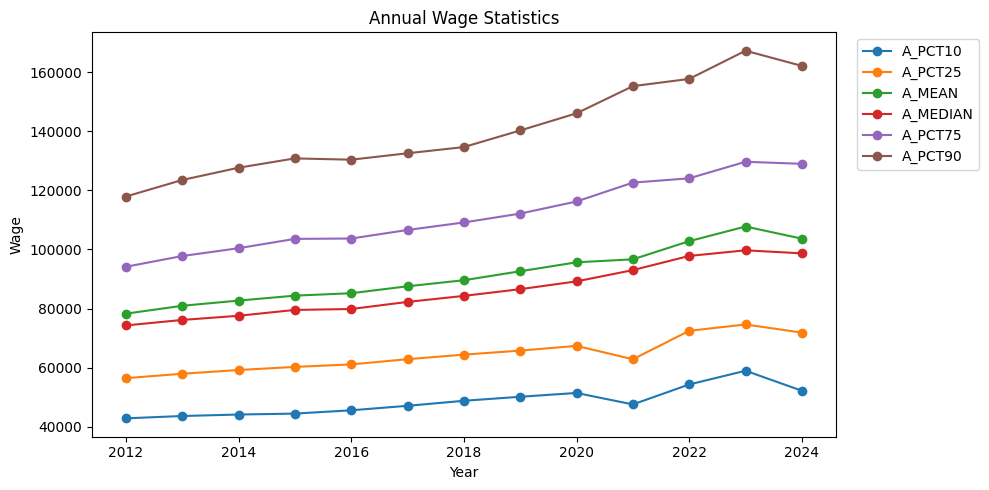

In [40]:
from src.dataAnalysis import getAnnualLineCharts
getAnnualLineCharts()

Make linear regression between annual wage statistics and year.

Regression fuction: y = 2360.7143x + -4672566.8132
R² score: 0.9582


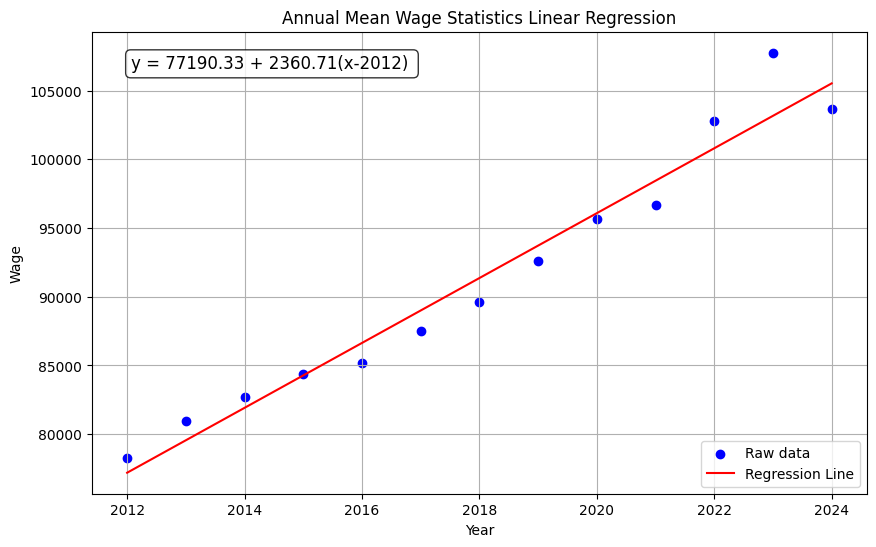

                            OLS Regression Results                            
Dep. Variable:                 A_MEAN   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     252.1
Date:                Mon, 05 May 2025   Prob (F-statistic):           6.25e-09
Time:                        03:06:49   Log-Likelihood:                -116.21
No. Observations:                  13   AIC:                             236.4
Df Residuals:                      11   BIC:                             237.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.135e+04    556.290    164.221      0.0

c:\Program Files\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=13 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [41]:
from src.dataAnalysis import getAnuualWageLinearRegression
getAnuualWageLinearRegression()

## Software Engineer Salary

For `Software Engineer Salary` data, explore the relationships between salary and city, relationships between median salary and salary gap, using bar charts, scatter charts and correlation analysis.

Plot the bar charts of software engineer mean salary in North America cities.

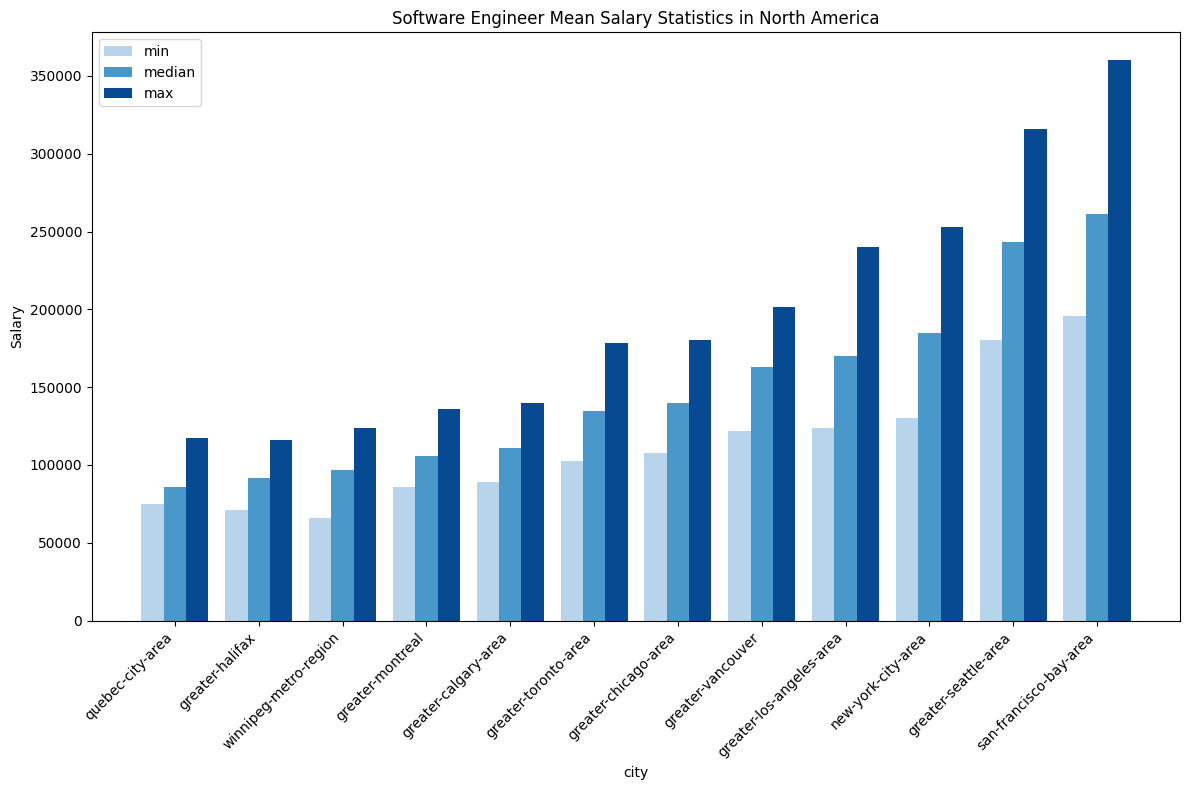

In [42]:
from src.dataAnalysis import getCityBarCharts
getCityBarCharts()

Plot the variance of data above by $median$ and $max-min$.

Mean of median : 148884.17, Std of median : 57970.05
Mean of max-min: 84394.08,  Std of max-min: 40505.52


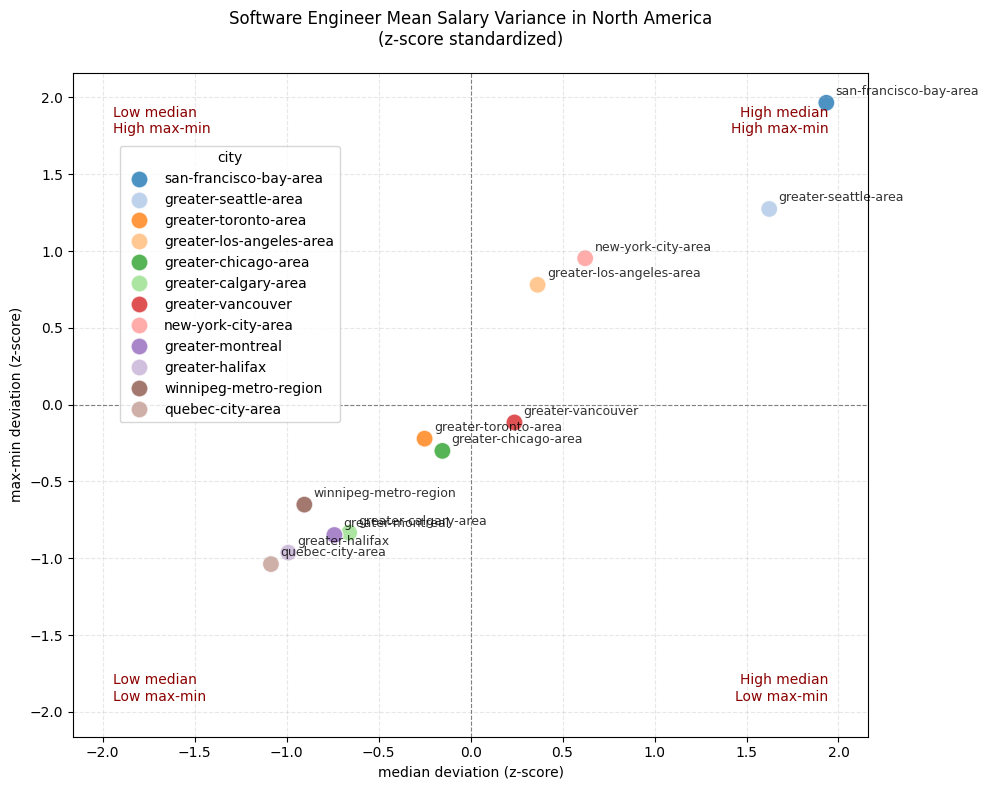

In [43]:
from src.dataAnalysis import getCityVariance2D
getCityVariance2D()

Calculate the correlation between $median$ and $max-min$.

In [44]:
from src.dataAnalysis import getCityVarianceCorrelation
getCityVarianceCorrelation()

Pearson correlation coefficient: 0.9698829346689041
Spearman correlation coefficient: 0.9720279720279721
Kendall correlation coefficient: 0.909090909090909


## U.S. Software Developer Salaries

For `U.S. Software Developer Salaries` data, explore the relationships between salary and number of jobs, purchasing power, using box plot, heat map and kernel density estimate.

Get EDA and box plot of salary, num_jobs and purchasing_power.

              salary      num_jobs  purchasing_power
count      77.000000     77.000000         77.000000
mean   101866.207792  19098.571429       7421.228571
std     13926.636588  23858.147274       1327.443694
min     80314.000000   1120.000000       4840.100000
25%     91976.000000   3170.000000       6464.200000
50%    100614.000000   8770.000000       7499.000000
75%    109503.000000  21160.000000       8153.100000
max    142101.000000  98650.000000      10673.700000


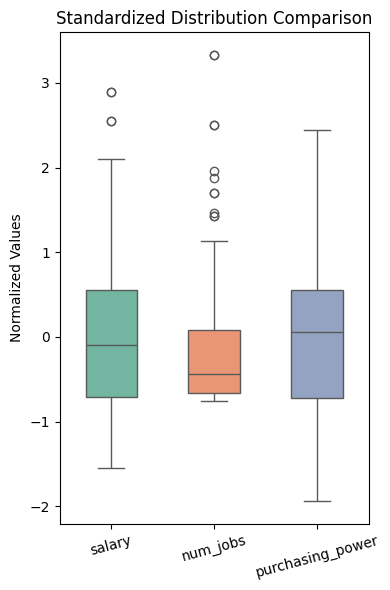

In [45]:
from src.dataAnalysis import getUSSalaryBoxPlot
getUSSalaryBoxPlot()

Heat map for salary, num_jobs and purchasing_power.

                    salary  num_jobs  purchasing_power
salary            1.000000  0.784464          0.349720
num_jobs          0.784464  1.000000          0.339211
purchasing_power  0.349720  0.339211          1.000000


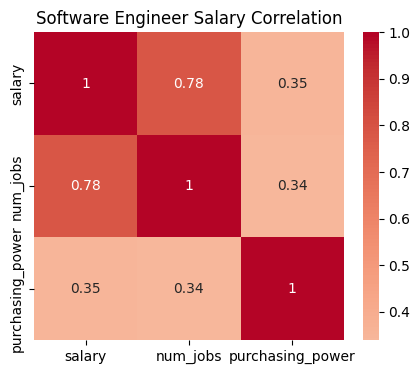

In [46]:
from src.dataAnalysis import getUSSalaryHeatMap
getUSSalaryHeatMap()

Relationships between salary and num_jobs by 2D joint KDE plot.

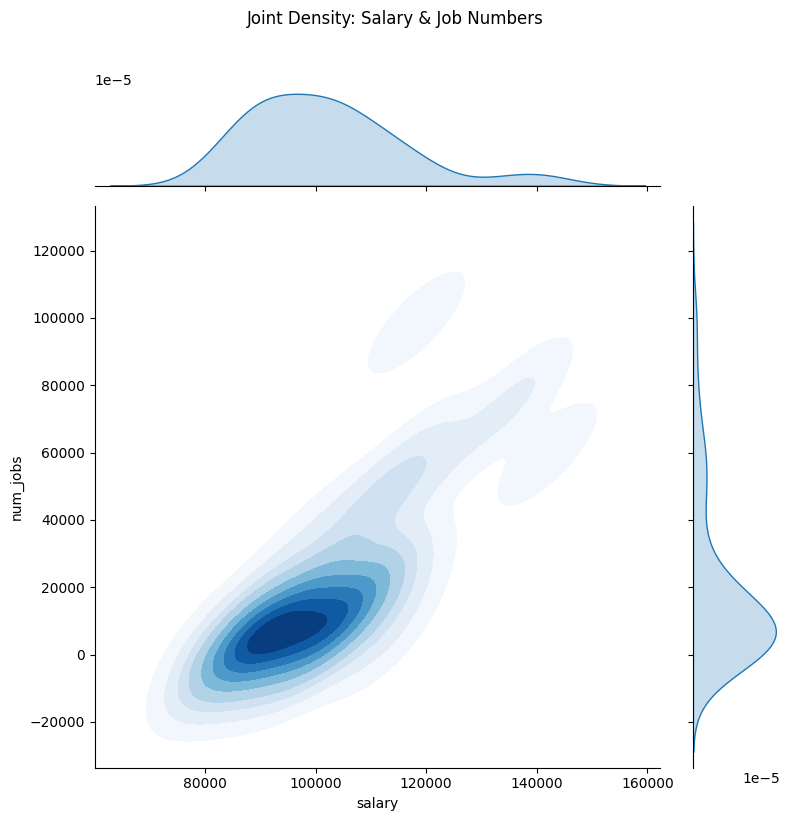

In [47]:
from src.dataAnalysis import getUSSalaryKDEPlot
getUSSalaryKDEPlot()

## Joint Analysis

Salary of different years in different city in combined city data of source 2 and source 3.

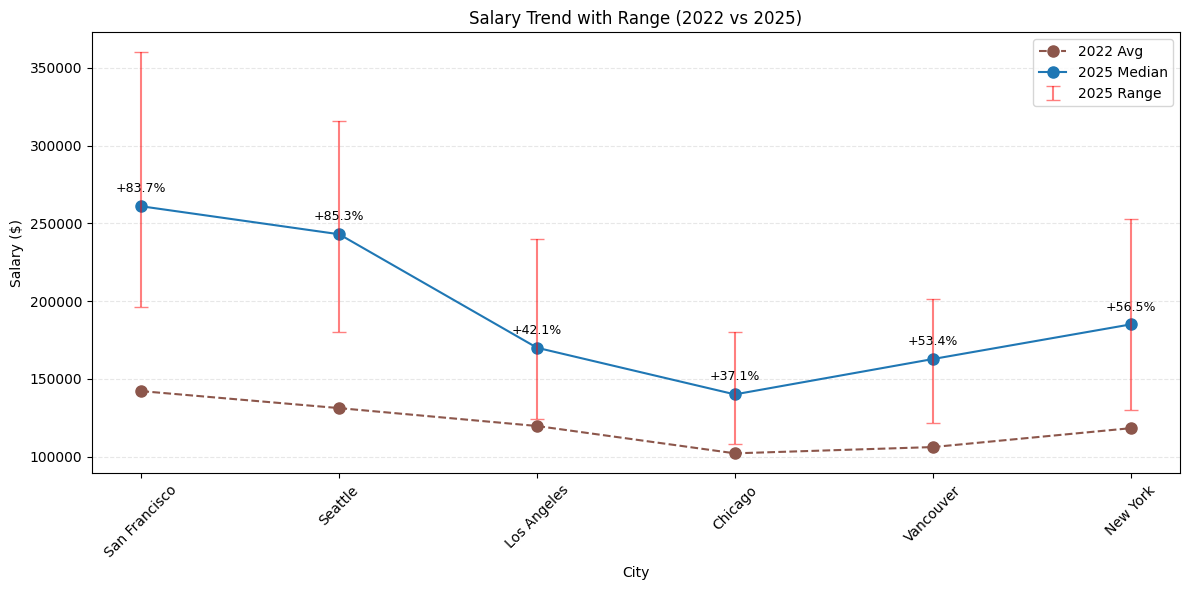

In [48]:
from src.dataJointAnalysis import getSalaryChange
getSalaryChange()

Print enhances data source 1 with 2025 data via linear regression prediction.

In [49]:
from src.dataJointAnalysis import completeYearWithLinearFit
from src.config import DATA_ANNUAL_WAGE_STATISTICS
import pandas as pd
df = pd.read_csv(DATA_ANNUAL_WAGE_STATISTICS)
completeYearWithLinearFit(df)

,Year,A_PCT10,A_PCT25,A_MEAN,A_MEDIAN,A_PCT75,A_PCT90
0,2012.0,42850.000000,56440.000000,78260.000000,74280.000000,94130.000000,117890.000000
1,2013.0,43640.000000,57940.000000,80930.000000,76140.000000,97760.000000,123490.000000
2,2014.0,44140.000000,59200.000000,82690.000000,77550.000000,100410.000000,127640.000000
3,2015.0,44450.000000,60250.000000,84360.000000,79530.000000,103570.000000,130800.000000
4,2016.0,45570.000000,61100.000000,85180.000000,79840.000000,103690.000000,130360.000000
5,2017.0,47090.000000,62860.000000,87530.000000,82240.000000,106580.000000,132530.000000
6,2018.0,48790.000000,64410.000000,89580.000000,84280.000000,109120.000000,134630.000000
7,2019.0,50150.000000,65760.000000,92610.000000,86550.000000,112120.000000,140250.000000
8,2020.0,51440.000000,67370.000000,95640.000000,89190.000000,116220.000000,146050.000000
9,2021.0,47560.000000,62840.000000,96650.000000,93000.000000,122600.000000,155240.000000


Compared the aboved with enhanced data source 1, to check the trend.

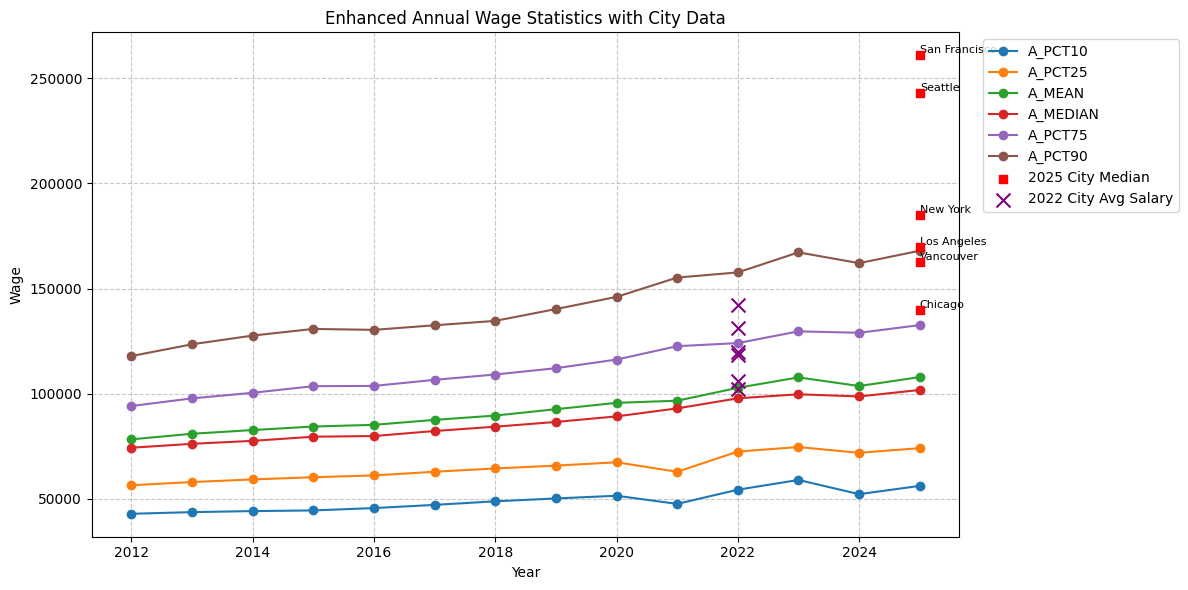

In [52]:
from src.dataJointAnalysis import getEnhancedAnnualLineCharts
getEnhancedAnnualLineCharts()